# Week 07: Support Vector Machine 
Data source:
https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
<br> Youtube link: https://www.youtube.com/watch?v=8A7L0GsBiLQ

<br> https://deepnote.com/@bhavesh-bhatt/svm-c-gamma-hyperparameter-ec7cdd4f-b499-4b4d-a320-f483e8099691

In [1]:
import numpy as np
import pandas as pd

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('credit_cards_dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [4]:
df.shape

(30000, 25)

In [5]:
df = df.drop('ID', axis = 1)
df.shape

(30000, 24)

In [6]:
df.rename({'default.payment.next.month' : 'DEFAULT'}, axis = 1, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

## Missing data

In [8]:
df_missing = df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0 )] # logical OR
df_missing.sample()
len(df_missing)
print('Percentage of missing value is ', round((len(df_missing)/len(df)*100),2), '%    < 1%')

Percentage of missing value is  0.23 %    < 1%


In [9]:
len(df)

30000

In [10]:
df_no_missing = df.loc[(df['MARRIAGE'] != 0) & (df['EDUCATION'] != 0) ] # Logical AND

In [11]:
df_no_missing['EDUCATION'].unique()
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [12]:
df_no_missing.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
# df_no_missing.loc[df_no_missing['DEFAULT'] == 0]
df_no_default = df_no_missing[(df_no_missing['DEFAULT'] == 0)]
df_default = df_no_missing[(df_no_missing['DEFAULT'] == 1)]
print('no default data size = ', len(df_no_default))
print('default data size = ', len(df_default))

no default data size =  23301
default data size =  6631


In [14]:
df_no_default_downsample = resample (df_no_default, replace = False, n_samples = 1000, random_state = 42)
len(df_no_default_downsample)

1000

In [15]:
df_default_downsample = resample (df_default, replace = False, n_samples = 1000, random_state = 42)
len(df_default_downsample)

1000

In [16]:
df_downsample = pd.concat([df_no_default_downsample, df_default_downsample])
len(df_downsample)

2000

In [17]:
df_downsample.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
18329,70000.0,2,2,2,23,0,0,0,0,0,...,28085.0,28487.0,27006.0,2782.0,2700.0,1732.0,1134.0,1128.0,1003.0,1
7651,170000.0,1,1,1,40,0,0,0,0,0,...,169821.0,173014.0,163570.0,7540.0,7540.0,6301.0,6517.0,6035.0,6435.0,0
26996,80000.0,1,1,2,34,2,2,2,2,2,...,64682.0,65614.0,67007.0,2800.0,3000.0,2500.0,2600.0,2600.0,2600.0,1
28688,50000.0,2,2,1,31,0,0,-2,-2,-1,...,0.0,3251.0,3484.0,0.0,0.0,0.0,3251.0,274.0,500.0,0
23039,220000.0,2,1,1,41,8,7,6,5,4,...,232446.0,227800.0,225044.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Split dataset to target and features

In [18]:
X = df_downsample.drop('DEFAULT', axis = 1)
y = df_downsample['DEFAULT']

In [19]:
print(X.shape, y.shape)

(2000, 23) (2000,)


### Encoding Categorical Variable
#### One Hot Encoding: 
[1] sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True) https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
<br> [2] pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
<br> https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html



In [20]:
X_encoded = pd.get_dummies(X, columns = ['SEX', 
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])
X_encoded.sample(6)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
21900,120000.0,27,113354.0,115503.0,121861.0,117485.0,118381.0,115604.0,6200.0,10900.0,...,0,0,0,1,0,0,0,0,0,0
7404,20000.0,34,14676.0,15721.0,19335.0,20029.0,20473.0,19860.0,1286.0,3900.0,...,0,0,0,1,0,0,0,0,0,0
8643,20000.0,38,17760.0,19646.0,17922.0,18895.0,19325.0,19859.0,6500.0,2000.0,...,0,0,0,1,0,0,0,0,0,0
10962,230000.0,46,4328.0,1518.0,1958.0,368.0,1613.0,1371.0,1518.0,1972.0,...,0,0,1,0,0,0,0,0,0,0
16124,80000.0,40,16413.0,12171.0,11554.0,7830.0,4305.0,5427.0,2160.0,1500.0,...,0,0,0,1,0,0,0,0,0,0
86,360000.0,45,390.0,1170.0,780.0,390.0,390.0,390.0,1170.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
X_encoded.shape

(2000, 81)

### Scaling

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,
                                                    random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1500, 81) (500, 81) (1500,) (500,)


In [23]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [24]:
# X_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
# X_scaled_df.shape

In [25]:
display(X_train.head(2))
display(X_train_scaled)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
20804,290000.0,42,0.0,0.0,0.0,0.0,1855.0,3940.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
17890,170000.0,28,56061.0,57179.0,58450.0,58556.0,51671.0,51090.0,2051.0,2197.0,...,0,0,0,1,0,0,0,0,0,0


array([[ 1.06764453,  0.66459398, -0.69871481, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [ 0.11806446, -0.8151    ,  0.04305464, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-0.51498893, -0.92079242, -0.36636674, ...,  0.        ,
        -0.0365392 , -0.05170877],
       ...,
       [ 1.22590788, -0.39233029,  3.60225397, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-0.27759391,  1.61582582, -0.69871481, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-1.06891064, -1.34356213, -0.47601594, ...,  0.        ,
        -0.0365392 , -0.05170877]])

### Preliminary Support Vector Machine

In [26]:
svm = SVC(random_state = 42)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

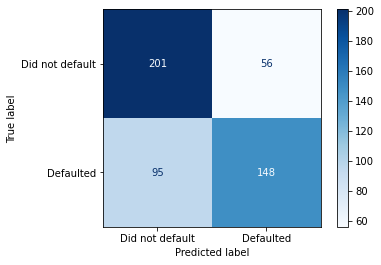

In [27]:
import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(svm, X_test_scaled, y_test, 
                      values_format = 'd',
                      display_labels = ['Did not default', 'Defaulted']
                      , cmap = 'Blues')

In [28]:
print("True 'Did not Default' = ", 201+56, '\n')
print("True 'Default' = ", 148+95, '\n')
print('Correctly classified "Did no Default" group =', 
      round(201/(201+56)*100,2), '%'  , '\n')
print('Correctly classified "Default" group =', 
      round(148/(148+95)*100,2), '%'  , '\n')

True 'Did not Default' =  257 

True 'Default' =  243 

Correctly classified "Did no Default" group = 78.21 % 

Correctly classified "Default" group = 60.91 % 



### Cross validation and GridSearchCV
scoring: 'accuracy'
    'balanced accuracy',
    'f1_micro',
    'f1_macro',
    'f1_weighted',
    'roc_auc'

In [30]:
param_grid = [
    {'C': [0.5, 1, 10, 50], #C>0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]

In [41]:
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5
                             , scoring = 'balanced_accuracy')

In [42]:
 optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 50],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='balanced_accuracy')

In [34]:
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


## Final SVM

In [53]:
svm = SVC(random_state = 42, C=10, gamma = 0.01)
svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01, random_state=42)

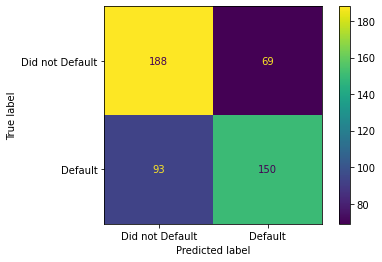

In [54]:
plot_confusion_matrix(svm, X_test_scaled, y_test, 
                      values_format = 'd',
                     display_labels = ['Did not Default', 'Default'])

In [89]:
len(df_downsample.columns)

24

## PCA

<BarContainer object of 81 artists>

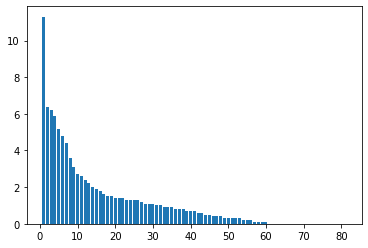

In [103]:
per_var = np.round(pca.explained_variance_ratio_* 100, 
                   decimals = 1)
labels = [str(x) for x in range (1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height = per_var)

In [107]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [
    {'C': [1,10,100,1000],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5,
                             scoring = 'accuracy', verbose = 0)
optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [110]:
clf_svm = SVC(random_state = 42, C = 1000, gamma = 0.001)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max,
                               step=0.1), 
                     np.arange(start = y_min, stop = y_max,
                               step=0.1))


In [111]:
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

In [117]:
from matplotlib.colors import ListedColormap

Text(0.5, 0, 'PC1')

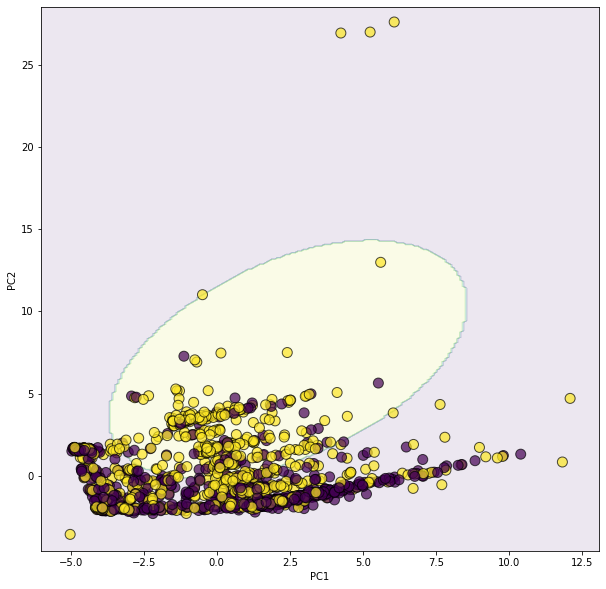

In [121]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.contourf(xx, yy, Z, alpha = 0.1)
# cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords,
                     c=y_train, s = 100,
                    edgecolors = 'k',
                    alpha = 0.7)
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')